In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [66]:
df=pd.read_csv("./Hitters.csv")

In [68]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [69]:
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [71]:
categ_features=[feature for feature in df.columns if df[feature].dtype=="O"]

In [72]:
categ_features

['League', 'Division', 'NewLeague']

In [73]:
categ_features_df=pd.get_dummies(df[['League', 'Division', 'NewLeague']],drop_first=True).astype('int')

In [75]:
categ_features_df.head()

,League_N,Division_W,NewLeague_N
0,0,0,0
1,1,1,1
2,0,1,0
3,1,0,1
4,1,0,1


In [76]:
df= pd.concat([df, categ_features_df], axis=1)


In [77]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,A,E,446,33,20,NaN,A,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,...,N,W,632,43,10,475.0,N,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,...,A,W,880,82,14,480.0,A,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,N,E,200,11,3,500.0,N,1,0,1
4,321,87,10,39,42,30,2,396,101,12,...,N,E,805,40,4,91.5,N,1,0,1


In [78]:
for feature in categ_features :
    print(df[feature].value_counts())

League
A    175
N    147
Name: count, dtype: int64
Division
W    165
E    157
Name: count, dtype: int64
NewLeague
A    176
N    146
Name: count, dtype: int64


In [88]:
df= df.drop(columns=categ_features ,  axis=1)

In [90]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1


In [92]:
df_with_null = df.copy()

In [94]:
df=df.dropna()

In [96]:
df.isna().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

In [102]:
df.corr()['Salary'].sort_values()

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

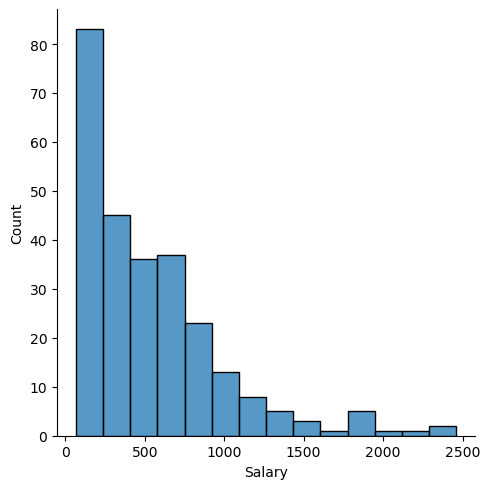

In [110]:
sns.displot(df['Salary']);

<Axes: >

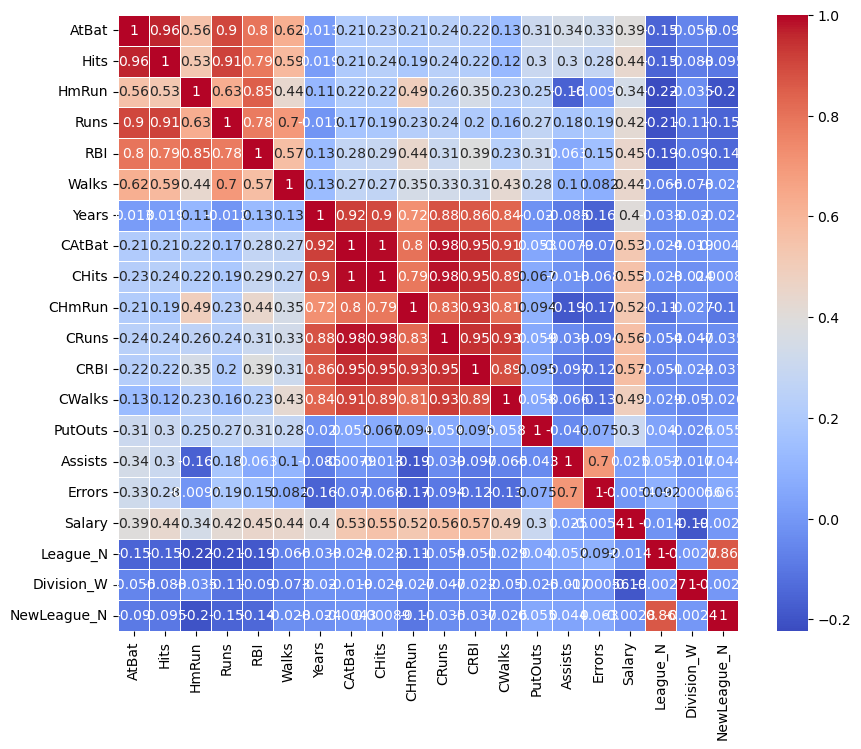

In [108]:
plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",  linewidths=0.5)

In [116]:
x=df.drop('Salary',axis=1)
y=df['Salary']

In [118]:
from sklearn.model_selection import train_test_split
x_tarin , x_test, y_tarin , y_test=train_test_split(x,y,test_size=0.35,random_state=365)

In [120]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_tarin=scale.fit_transform(x_tarin)
x_test=scale.transform(x_test)

In [124]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(x_tarin,y_tarin)

LinearRegression()

In [128]:
y_pred = lin_reg.predict(x_test)

In [130]:
lin_com=pd.DataFrame({"Predicted":y_pred,"Actual":y_test})

In [134]:
lin_com

,Predicted,Actual
14,415.457828,240.0
181,432.207803,737.5
177,758.783497,1300.0
124,799.003367,737.5
277,350.205865,475.0
...,...,...
303,422.501932,425.0
264,383.905451,250.0
31,115.778511,110.0
204,315.352309,780.0


In [ ]:
## rmse square error is he best for regression 

In [144]:
from sklearn.metrics import mean_squared_error
import math
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print("Linear Regression Model Training Score: ",lin_reg.score(x_tarin, y_tarin))
print("Linear Regression Model Testing Score: ",lin_reg.score(x_test, y_test))

Linear Regression Model RMSE is:  313.23956789940627
Linear Regression Model Training Score:  0.568058916051897
Linear Regression Model Testing Score:  0.3455994829736332


In [150]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.3455994829736332


In [152]:
from sklearn.model_selection import RepeatedKFold 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV 

In [154]:
cv=RepeatedKFold(n_splits=5,n_repeats=3 , random_state=1)

In [156]:
cv=RepeatedKFold(n_splits=5,n_repeats=3 , random_state=1)
ridege=RidgeCV(alphas=np.arange(0.1,10,0.1) , cv =cv , scoring="neg_mean_squared_error")

In [158]:
ridege.fit(x_tarin,y_tarin)
ridege_y_pred=ridege.predict(x_test)
print(ridege.alpha_)

9.9


In [160]:
print(ridege.alpha_)
print(ridege.coef_)
print(ridege.intercept_)

9.9
[ -99.64056512   87.85475144   -3.70978058   22.50316688   18.34973213
   68.1928924   -55.21554926   -5.93096462  127.21511684   21.56457876
  129.7438877    93.22509485 -102.97057988  116.56925232   31.19052366
  -10.05599857   39.05110375  -80.7269112   -22.53792401]
532.2961176470588


In [162]:
print("R² Score:", r2_score(y_test, ridege_y_pred) )

R² Score: 0.4444124247349731


In [180]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridege_y_pred)))
print("Linear Regression Model Training Score: ",ridege.score(x_tarin, y_tarin))
print("Linear Regression Model Testing Score: ",ridege.score(x_test, y_test))

Linear Regression Model RMSE is:  288.623083252728
Linear Regression Model Training Score:  0.5278667721769686
Linear Regression Model Testing Score:  0.4444124247349731


array([ 428.97451414,  440.50154242,  719.09476594,  710.63990637,
        384.50033132,  346.52808952,  149.84970685,  492.04102764,
        977.17609965,  561.06951622,  552.28019985,  486.23988603,
        806.83949497,  664.22618588,  595.26591689,  356.00691871,
        347.15295442,  692.07047829,  237.47091175,  673.89792069,
        820.81628484,  231.88175537,  697.94078643, 1209.97667656,
        938.7108872 , 1557.70480981,  785.69101145, 1119.83034043,
        555.52808437, 1179.72496624,  503.40177746,  472.65808411,
        580.19408848,  509.74993218,  132.95959385,  149.15866478,
        191.05508547, 1081.37736599,  748.85406376,  341.03650226,
        416.32117806,  428.25478278,  712.17701387,  404.41611188,
        528.1510833 ,  464.722522  ,  681.73168919,  563.17901243,
        701.57371739,  704.39003106, 1444.51515649,  690.60923691,
        451.79571066,  457.02628037,  848.22453936,  655.57775915,
        522.68908074,   74.42454575,  396.99840549,  184.72015

In [174]:
lasso=LassoCV(alphas=np.arange(0.1,10,0.1) , cv =cv , tol=1)

In [176]:
lasso.fit(x_tarin,y_tarin)
lasso_y_pred=lasso.predict(x_test)

In [182]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_y_pred)))
print("Linear Regression Model Training Score: ",lasso.score(x_tarin, y_tarin))
print("Linear Regression Model Testing Score: ",lasso.score(x_test, y_test))

Linear Regression Model RMSE is:  304.2072505265753
Linear Regression Model Training Score:  0.4482426197173428
Linear Regression Model Testing Score:  0.3827948756282943
